In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

In [2]:
distribution = stats.lognorm(0.75)

In [3]:
x = np.linspace(0, 10, 21)
x[0] += 0.001
y = distribution.pdf(x)

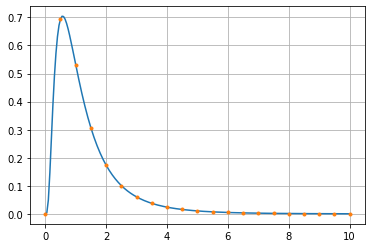

In [4]:
xl = np.linspace(0.001, 10, 201)
fig, axe = plt.subplots()
axe.plot(xl, distribution.pdf(xl))
axe.plot(x, y, '.')
axe.grid()

In [5]:
X = x.reshape(-1, 1)

In [6]:
transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)

In [7]:
polynomial = PolynomialFeatures(2)

In [8]:
regressor = TransformedTargetRegressor(regressor=LinearRegression(), transformer=transformer)

In [9]:
model = Pipeline(steps=[
    ("transformer", transformer),
    ("polynomial", polynomial),
    ("regressor", regressor)
])

In [10]:
model.fit(X, y)

Pipeline(steps=[('transformer',
                 FunctionTransformer(func=<ufunc 'log'>,
                                     inverse_func=<ufunc 'exp'>)),
                ('polynomial', PolynomialFeatures()),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log'>,
                                                                            inverse_func=<ufunc 'exp'>)))])

In [11]:
model.score(X, y)

1.0

In [12]:
yhat = model.predict(xl.reshape(-1, 1))

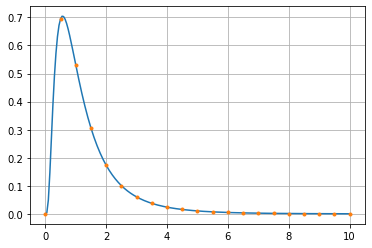

In [13]:
xl = np.linspace(0, 10, 201)
fig, axe = plt.subplots()
axe.plot(xl, yhat)
axe.plot(x, y, '.')
axe.grid()

In [14]:
p = model.steps[-1][1].regressor_.coef_
p

array([ 0.        , -1.        , -0.88888889])

In [15]:
s = np.sqrt(-1/(2*p[2]))
s

0.7500000000000001